In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from figure import plots

In [24]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table

# Random split

In [25]:
split = 'trtssplit'

svm_b      = pd.read_csv('./Score_wodirection_%s/SVM/mean.tsv'%split, sep='\t', index_col=0)
mpn_sep_b  = pd.read_csv('./Score_wodirection_%s/MPNN_separated/mean.tsv'%split, sep='\t', index_col=0)

svm_ub     = pd.read_csv('./Score_unbiased_%s/SVM/mean.tsv'%split, sep='\t', index_col=0)
mpn_sep_ub = pd.read_csv('./Score_unbiased_%s/MPNN_separated/mean.tsv'%split, sep='\t', index_col=0)

svm_b      = svm_b.loc[svm_ub.index,:]
mpn_sep_b  = mpn_sep_b.loc[mpn_sep_ub.index, :]

svm_b      = assign_vals(svm_b, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn_sep_b  = assign_vals(mpn_sep_b, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
svm_ub     = assign_vals(svm_ub, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn_sep_ub = assign_vals(mpn_sep_ub, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


svm_b['model']     = 'svm'
mpn_sep_b['model'] = 'mpnn_sep'
svm_ub['model']     = 'svm_balanced'
mpn_sep_ub['model'] = 'mpnn_sep_balanced'


all_score = pd.concat([svm_b, mpn_sep_b, svm_ub, mpn_sep_ub,])


/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with lab

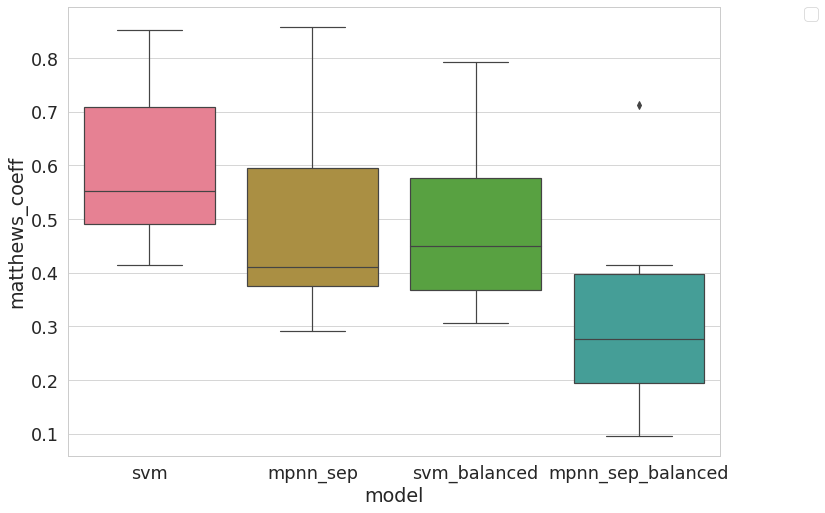

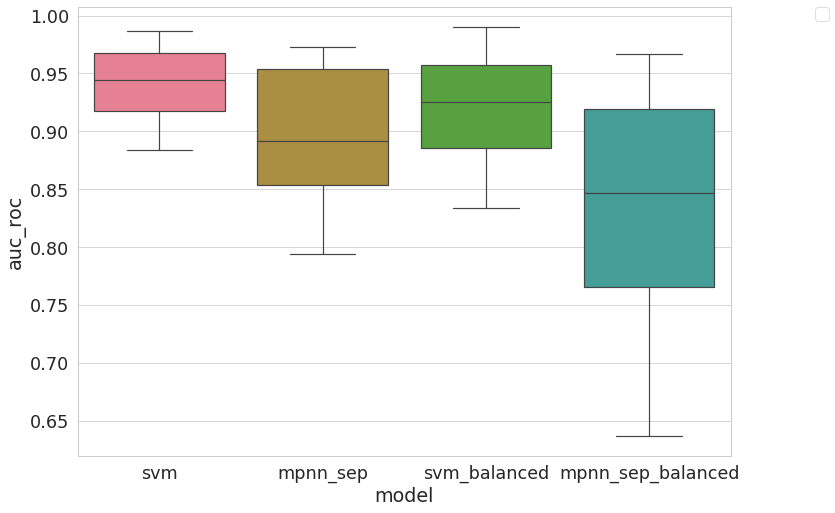

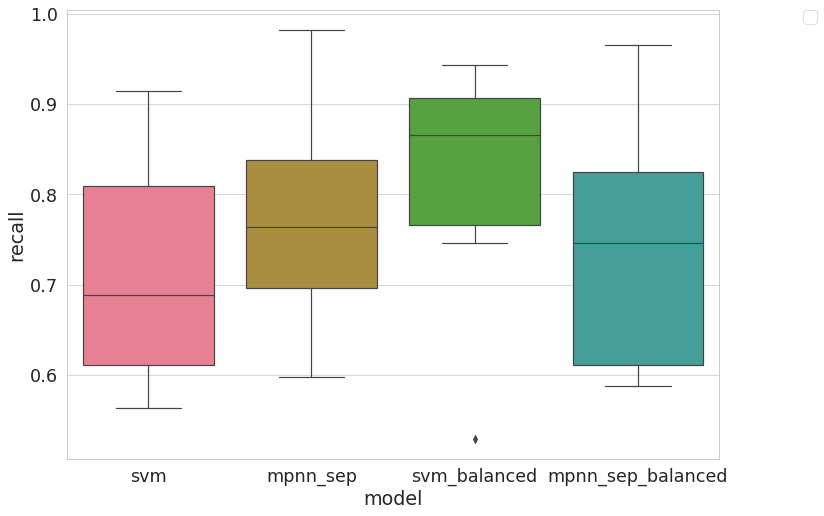

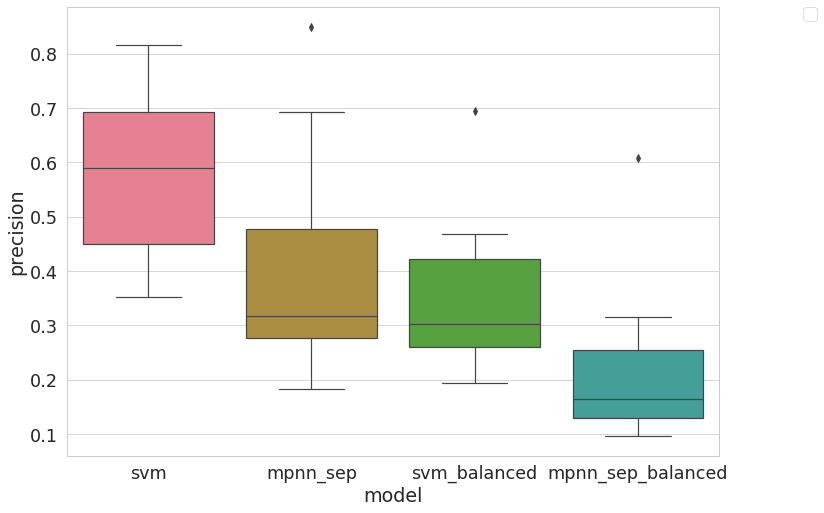

In [27]:
os.makedirs('./Score_unbiased/swarm_performance_%s/' %(split), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = False,
                            )
    plt.savefig('./Score_unbiased/swarm_performance_%s/swarm_%s.png' %(split, metric))

# Bothout

In [28]:
split = 'axv'

svm_b      = pd.read_csv('./Score_%s/SVM/mean_bothout.tsv'%split, sep='\t', index_col=0)
mpn_sep_b  = pd.read_csv('./Score_%s/MPNN_separated/mean_bothout.tsv'%split, sep='\t', index_col=0)

svm_ub     = pd.read_csv('./Score_unbiased_%s/SVM/mean_bothout.tsv'%split, sep='\t', index_col=0)
mpn_sep_ub = pd.read_csv('./Score_unbiased_%s/MPNN_separated/mean_bothout.tsv'%split, sep='\t', index_col=0)

svm_b      = svm_b.loc[svm_ub.index,:]
mpn_sep_b  = mpn_sep_b.loc[mpn_sep_ub.index, :]

svm_b      = assign_vals(svm_b, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn_sep_b  = assign_vals(mpn_sep_b, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
svm_ub     = assign_vals(svm_ub, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn_sep_ub = assign_vals(mpn_sep_ub, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


svm_b['model']     = 'svm'
mpn_sep_b['model'] = 'mpnn_sep'
svm_ub['model']     = 'svm_balanced'
mpn_sep_ub['model'] = 'mpnn_sep_balanced'


all_score = pd.concat([svm_b, mpn_sep_b, svm_ub, mpn_sep_ub,])


/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/bit/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with lab

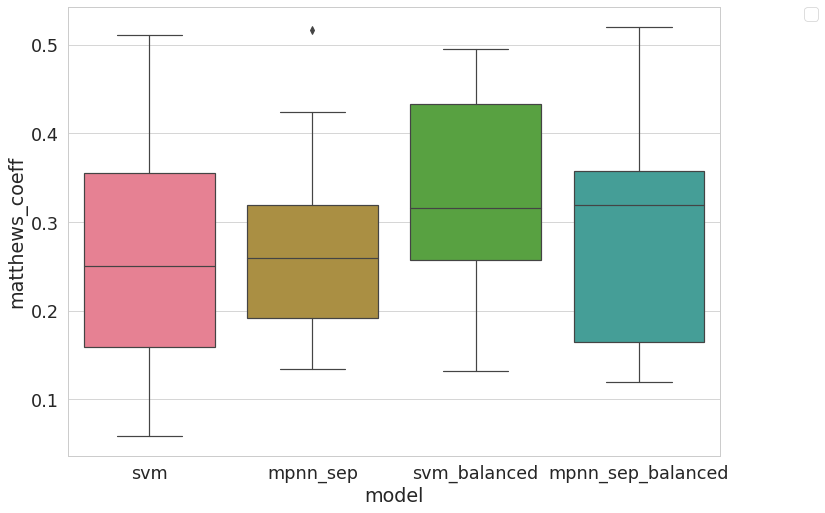

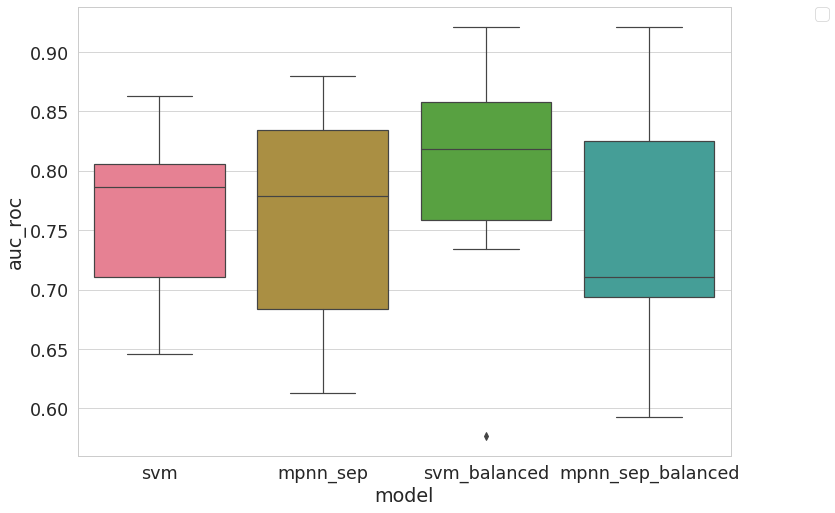

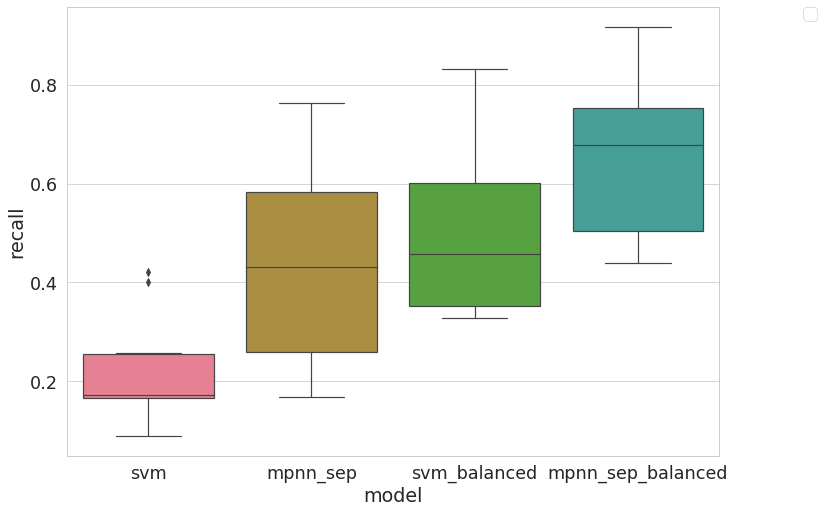

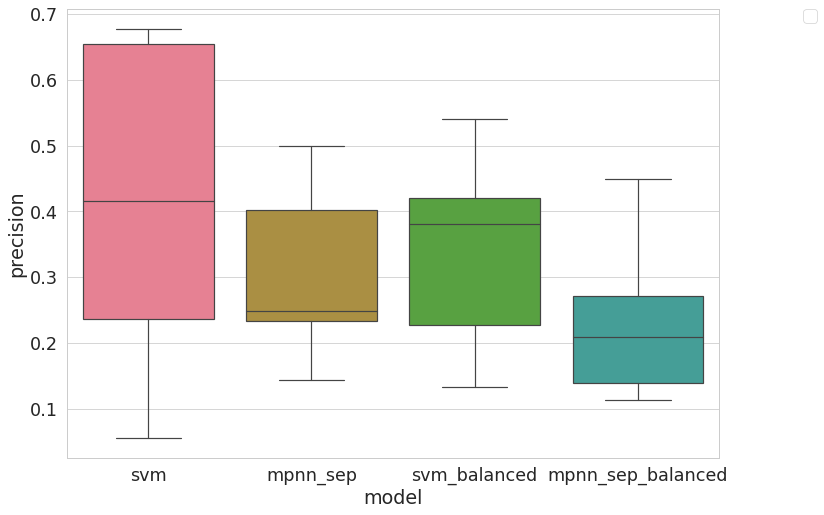

In [29]:
os.makedirs('./Score_unbiased_axv/swarm_performance_%s/' %(split), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = False,
                            )
    plt.savefig('./Score_unbiased_axv/swarm_performance_%s/swarm_%s.png' %(split, metric))